In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/female headed renewed- india.xlsx")
df.head()

,Table name,State Code,District Code,Tehsil code,Town code,Area Name,Total/Rural/Urban,Main Source Of Drinking Water,Availability Of Drinking water,Total No. Of Female Headed Household,Latrine Available (EA),Latrine Not Available (EA),Latrine Available (EN),Latrine Not Available (EN)
0,HH5200,0,0,0,0,INDIA,Total,All Sources,Total number of households,26888926,11557154,7325310,1430737,6575725
1,HH5200,0,0,0,0,INDIA,Total,All Sources,Within premises,12099440,8412467,1747800,644792,1294381
2,HH5200,0,0,0,0,INDIA,Total,All Sources,Near premises,9998807,2320548,3966587,502723,3208949
3,HH5200,0,0,0,0,INDIA,Total,All Sources,Away,4790679,824139,1610923,283222,2072395
4,HH5200,0,0,0,0,INDIA,Total,Tap water from treated source,Total number of households,9523607,5997762,2508980,234413,782452


In [ ]:
df=df.drop(columns=['Table name','District Code','Tehsil code','Town code'],axis=0)


In [ ]:
df.head()

,State Code,Area Name,Total/Rural/Urban,Main Source Of Drinking Water,Availability Of Drinking water,Total No. Of Female Headed Household,Latrine Available (EA),Latrine Not Available (EA),Latrine Available (EN),Latrine Not Available (EN)
0,0,INDIA,Total,All Sources,Total number of households,26888926,11557154,7325310,1430737,6575725
1,0,INDIA,Total,All Sources,Within premises,12099440,8412467,1747800,644792,1294381
2,0,INDIA,Total,All Sources,Near premises,9998807,2320548,3966587,502723,3208949
3,0,INDIA,Total,All Sources,Away,4790679,824139,1610923,283222,2072395
4,0,INDIA,Total,Tap water from treated source,Total number of households,9523607,5997762,2508980,234413,782452


In [ ]:
df['Main Source Of Drinking Water'].unique()

array(['All Sources', 'Tap water from treated source',
       'Tap water from un-treated source', 'Covered well',
       'Un-Covered well', 'Hand pump', 'Tube well/Borehole', 'All Others'],
      dtype=object)

In [ ]:
df1 = df[(df['Area Name'] != 'INDIA') & (df['Total/Rural/Urban'] != 'Total')]
df1['Total/Rural/Urban'].unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
df1.describe()

,State Code,Total No. Of Female Headed Household,Latrine Available (EA),Latrine Not Available (EA),Latrine Available (EN),Latrine Not Available (EN)
count,2240.00000,2.240000e+03,2240.00000,2.240000e+03,2240.000000,2.240000e+03
mean,18.00000,4.801594e+04,20637.77500,1.308091e+04,2554.887500,1.174237e+04
std,10.10176,1.513061e+05,72970.06149,5.656758e+04,12963.617484,6.126013e+04
min,1.00000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000e+00
25%,9.00000,2.297500e+02,105.00000,3.000000e+01,5.000000,7.000000e+00
50%,18.00000,3.280500e+03,1227.00000,4.405000e+02,118.000000,2.010000e+02
75%,27.00000,2.168200e+04,7907.00000,4.490750e+03,817.250000,2.441250e+03
max,35.00000,1.979700e+06,798582.00000,1.138315e+06,228762.000000,1.316345e+06


In [ ]:
df1['Total No. Of Female Headed Household'].max()

1979700

In [ ]:
df1.groupby(["Total/Rural/Urban"])['Total No. Of Female Headed Household'].max()

Total/Rural/Urban
Rural    1979700
Urban    1193745
Name: Total No. Of Female Headed Household, dtype: int64

# PLOT 1

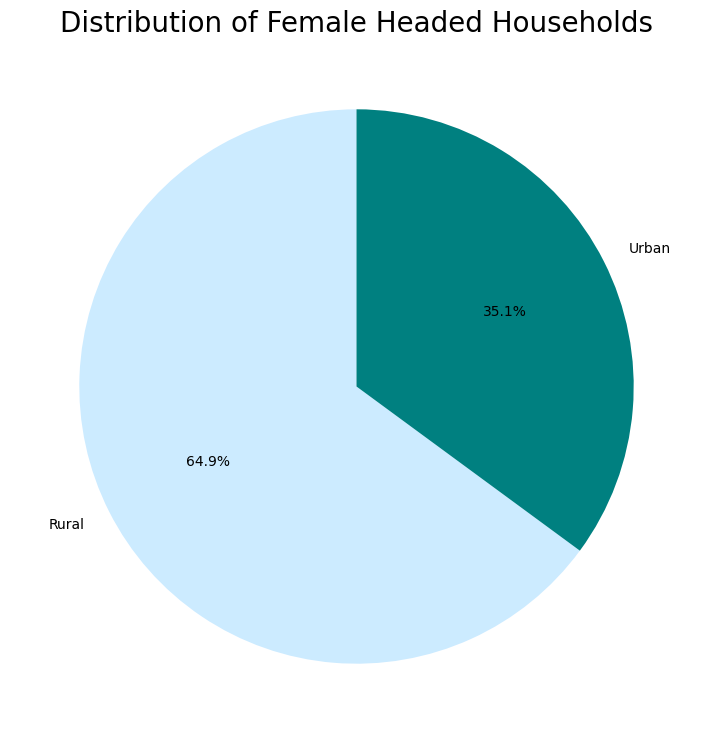

In [ ]:
grouped_data = df1.groupby('Total/Rural/Urban')['Total No. Of Female Headed Household'].sum()

# Create a pie chart using Matplotlib
plt.figure(figsize=(9, 9))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90,colors=['#ccebff','teal'])
plt.title('Distribution of Female Headed Households',fontsize=20)
plt.show()

# PLOT 2

In [ ]:
colors = {'Latrine Available (EN)': 'teal', 'Latrine Not Available (EN)': 'darkgoldenrod'}
fig = px.histogram(
    df1,
    x="Total/Rural/Urban",
    y=["Latrine Available (EN)", "Latrine Not Available (EN)"],
    barmode='group',
    color_discrete_map=colors,
    title="Latrine Availability by Rural/Urban",
    labels={"value": "Count", "Total/Rural/Urban": "Category"},
    height=400
)
fig.update_yaxes(title_text="Total Number Of Households")

fig.show()

In [ ]:
colors = {'Latrine Available (EA)': 'darkslategrey', 'Latrine Not Available (EA)': 'aquamarine'}
fig = px.histogram(
    df1,
    x="Total/Rural/Urban",
    y=["Latrine Available (EA)", "Latrine Not Available (EA)"],
    barmode='group',
    color_discrete_map=colors,
    title="Latrine Availability by Rural/Urban",
    labels={"value": "Count", "Total/Rural/Urban": "Category"},
    height=400
)
fig.update_yaxes(title_text="Total Number Of Households")

fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   State Code                            3456 non-null   int64 
 1   Area Name                             3456 non-null   object
 2   Total/Rural/Urban                     3456 non-null   object
 3   Main Source Of Drinking Water         3456 non-null   object
 4   Availability Of Drinking water        3456 non-null   object
 5   Total No. Of Female Headed Household  3456 non-null   int64 
 6   Latrine Available (EA)                3456 non-null   int64 
 7   Latrine Not Available (EA)            3456 non-null   int64 
 8   Latrine Available (EN)                3456 non-null   int64 
 9   Latrine Not Available (EN)            3456 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 270.1+ KB


In [ ]:
df1["Area Name"].unique()

array(['STATE - JAMMU & KASHMIR', 'STATE - HIMACHAL PRADESH',
       'STATE - PUNJAB', 'STATE - CHANDIGARH', 'STATE - UTTARAKHAND',
       'STATE - HARYANA', 'STATE - NCT OF DELHI', 'STATE - RAJASTHAN',
       'STATE - UTTAR PRADESH', 'STATE - BIHAR', 'STATE - SIKKIM',
       'STATE - ARUNACHAL PRADESH', 'STATE - NAGALAND', 'STATE - MANIPUR',
       'STATE - MIZORAM', 'STATE - TRIPURA', 'STATE - MEGHALAYA',
       'STATE - ASSAM', 'STATE - WEST BENGAL', 'STATE - JHARKHAND',
       'STATE - ODISHA', 'STATE - CHATTISGARH', 'STATE - MADHYA PRADESH',
       'STATE - GUJARAT', 'STATE - DAMAN & DIU',
       'STATE - DADRA & NAGAR HAVELI', 'STATE - MAHARASHTRA',
       'STATE - ANDHRA PRADESH', 'STATE - KARNATAKA', 'STATE - GOA',
       'STATE - LAKSHADWEEP', 'STATE - KERALA', 'STATE - TAMIL NADU',
       'STATE - PUDUCHERRY', 'STATE - ANDAMAN & NICOBAR ISLANDS'],
      dtype=object)

In [ ]:
df1['Area Name'] = df['Area Name'].replace('STATE - ', '', regex=True)

<ipython-input-15-43884ae9fafc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
desired_area_names = ['ANDAMAN & NICOBAR ISLANDS', 'LAKSHADWEEP', 'PUDUCHERRY', 'DADRA & NAGAR HAVELI', 'NCT OF DELHI', 'DAMAN & DIU']
Union_Terri = df1[df1['Area Name'].isin(desired_area_names)]
Union_Terri.head()

,State Code,Area Name,Total/Rural/Urban,Main Source Of Drinking Water,Availability Of Drinking water,Total No. Of Female Headed Household,Latrine Available (EA),Latrine Not Available (EA),Latrine Available (EN),Latrine Not Available (EN)
704,7,NCT OF DELHI,Rural,All Sources,Total number of households,8001,5638,2159,63,141
705,7,NCT OF DELHI,Rural,All Sources,Within premises,4736,4258,424,26,28
706,7,NCT OF DELHI,Rural,All Sources,Near premises,2285,920,1257,27,81
707,7,NCT OF DELHI,Rural,All Sources,Away,980,460,478,10,32
708,7,NCT OF DELHI,Rural,Tap water from treated source,Total number of households,3980,3315,616,22,27


In [ ]:
grouped_df_Union = Union_Terri.groupby(['Area Name', 'Total/Rural/Urban'])['Total No. Of Female Headed Household'].sum().reset_index()

# PLOT 3

In [ ]:
color_map = {'Rural': 'teal', 'Urban': 'gold'}
fig1= px.bar(grouped_df_Union, x='Area Name', y='Total No. Of Female Headed Household', color='Total/Rural/Urban',color_discrete_map=color_map, barmode='group',
             title='Female Headed Households in Rural and Urban Areas across Union Territories of India')
fig1.show()

In [ ]:
States = df1[~df1['Area Name'].isin(['INDIA']) & ~df1['Area Name'].isin(desired_area_names)]


In [ ]:
grouped_df_states = States.groupby(['Area Name', 'Total/Rural/Urban'])['Total No. Of Female Headed Household'].sum().reset_index()
grouped_df_states.head()

,Area Name,Total/Rural/Urban,Total No. Of Female Headed Household
0,ANDHRA PRADESH,Rural,7907212
1,ANDHRA PRADESH,Urban,3175248
2,ARUNACHAL PRADESH,Rural,80772
3,ARUNACHAL PRADESH,Urban,34120
4,ASSAM,Rural,2418612


# PLOT 4

In [ ]:
fig = px.bar(grouped_df_states, x='Area Name', y='Total No. Of Female Headed Household', color='Total/Rural/Urban', barmode='group',
             title='Female Headed Households in Rural and Urban Areas across States in India')
fig.show()

In [ ]:
water_source_and_availability = df1.groupby(['Main Source Of Drinking Water', 'Availability Of Drinking water'])['Total No. Of Female Headed Household'].sum().reset_index()

In [ ]:
water_source_and_availability

,Main Source Of Drinking Water,Availability Of Drinking water,Total No. Of Female Headed Household
0,All Others,Away,546080
1,All Others,Near premises,417835
2,All Others,Total number of households,963915
3,All Others,Within premises,0
4,All Sources,Away,4790679
5,All Sources,Near premises,9998807
6,All Sources,Total number of households,26888926
7,All Sources,Within premises,12099440
8,Covered well,Away,89335
9,Covered well,Near premises,119767


# PLOT 5

In [ ]:
# Group by 'Main Source Of Drinking Water' and 'Availability Of Drinking water', and sum the 'Total No. Of Female Headed Household'
water_source_and_availability = df1.groupby(['Main Source Of Drinking Water', 'Availability Of Drinking water', 'Total/Rural/Urban'])['Total No. Of Female Headed Household'].sum().reset_index()

rural_data = water_source_and_availability[water_source_and_availability['Total/Rural/Urban'] == 'Rural']
urban_data = water_source_and_availability[water_source_and_availability['Total/Rural/Urban'] == 'Urban']

fig1 = px.bar(rural_data, x='Main Source Of Drinking Water', y='Total No. Of Female Headed Household', color='Availability Of Drinking water', barmode='group',
             title='Female Headed Households in Rural Areas across States in India')
fig2 = px.bar(urban_data, x='Main Source Of Drinking Water', y='Total No. Of Female Headed Household', color='Availability Of Drinking water', barmode='group',
             title='Female Headed Households in Urban Areas across States in India')
fig1.show()
fig2.show()


In [ ]:
h=df1.groupby(["Total/Rural/Urban","Main Source Of Drinking Water","Availability Of Drinking water"])["Total No. Of Female Headed Household"].mean()
h

Total/Rural/Urban  Main Source Of Drinking Water  Availability Of Drinking water
Rural              All Others                     Away                               12197.742857
                                                  Near premises                       8480.400000
                                                  Total number of households         20678.142857
                                                  Within premises                        0.000000
                   All Sources                    Away                              112574.085714
                                                                                        ...      
Urban              Tube well/Borehole             Within premises                    12569.057143
                   Un-Covered well                Away                                1943.428571
                                                  Near premises                       3090.771429
                                     

In [ ]:
df1.head()

,State Code,Area Name,Total/Rural/Urban,Main Source Of Drinking Water,Availability Of Drinking water,Total No. Of Female Headed Household,Latrine Available (EA),Latrine Not Available (EA),Latrine Available (EN),Latrine Not Available (EN)
128,1,JAMMU & KASHMIR,Rural,All Sources,Total number of households,112137,30675,62124,3033,16305
129,1,JAMMU & KASHMIR,Rural,All Sources,Within premises,41231,18453,20483,793,1502
130,1,JAMMU & KASHMIR,Rural,All Sources,Near premises,37597,8101,22010,1233,6253
131,1,JAMMU & KASHMIR,Rural,All Sources,Away,33309,4121,19631,1007,8550
132,1,JAMMU & KASHMIR,Rural,Tap water from treated source,Total number of households,25041,9155,13970,402,1514


In [ ]:
# Define the unique values for 'Main Source Of Drinking Water'
unique_sources = ['All Sources', 'Tap water from treated source', 'Tap water from un-treated source',
                  'Covered well', 'Un-Covered well', 'Hand pump', 'Tube well/Borehole', 'All Others']

# Define custom numerical ranks for each source
custom_ranks = [7, 1, 6, 2, 3, 5, 4, 7]  # Adjust these ranks as desired

# Create a dictionary to map unique values to custom numerical ranks
source_rank_mapping = {source: rank for source, rank in zip(unique_sources, custom_ranks)}


# Apply the custom numerical ranks to the 'Main Source Of Drinking Water' column
df1['Source Rank'] = df1['Main Source Of Drinking Water'].map(source_rank_mapping)

# Group df1 by state and calculate the average Facilities Score for each state
state_scores = df1.groupby(['Area Name','Source Rank'])['Total No. Of Female Headed Household'].mean()


<ipython-input-27-caf99b31e756>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
state_scores = df1.groupby(['Area Name','Source Rank',"Availability Of Drinking water"])['Total No. Of Female Headed Household'].mean().reset_index()

In [ ]:
state_scores

,Area Name,Source Rank,Availability Of Drinking water,Total No. Of Female Headed Household
0,ANDAMAN & NICOBAR ISLANDS,1,Away,230.00
1,ANDAMAN & NICOBAR ISLANDS,1,Near premises,774.50
2,ANDAMAN & NICOBAR ISLANDS,1,Total number of households,3856.00
3,ANDAMAN & NICOBAR ISLANDS,1,Within premises,2851.50
4,ANDAMAN & NICOBAR ISLANDS,2,Away,15.50
...,...,...,...,...
975,WEST BENGAL,6,Within premises,18475.00
976,WEST BENGAL,7,Away,158369.00
977,WEST BENGAL,7,Near premises,201756.25
978,WEST BENGAL,7,Total number of households,572380.75


In [ ]:
state_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Area Name                             980 non-null    object 
 1   Source Rank                           980 non-null    int64  
 2   Availability Of Drinking water        980 non-null    object 
 3   Total No. Of Female Headed Household  980 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 30.8+ KB


In [ ]:
rural_urban = df1.groupby(['Total/Rural/Urban','Area Name','Source Rank',"Availability Of Drinking water"])['Total No. Of Female Headed Household'].mean().reset_index()

In [ ]:
rural_urban.head()

,Total/Rural/Urban,Area Name,Source Rank,Availability Of Drinking water,Total No. Of Female Headed Household
0,Rural,ANDAMAN & NICOBAR ISLANDS,1,Away,403.0
1,Rural,ANDAMAN & NICOBAR ISLANDS,1,Near premises,1098.0
2,Rural,ANDAMAN & NICOBAR ISLANDS,1,Total number of households,4022.0
3,Rural,ANDAMAN & NICOBAR ISLANDS,1,Within premises,2521.0
4,Rural,ANDAMAN & NICOBAR ISLANDS,2,Away,25.0


In [ ]:
rural_urban1= rural_urban[rural_urban["Source Rank"]==1] #Lowest Rank
rural_urban1=rural_urban1[(rural_urban1["Availability Of Drinking water"]=="Within premises")].sort_values(by="Total No. Of Female Headed Household",ascending=False)
rural_urban1.head()

,Total/Rural/Urban,Area Name,Source Rank,Availability Of Drinking water,Total No. Of Female Headed Household
1515,Urban,MAHARASHTRA,1,Within premises,850493.0
1011,Urban,ANDHRA PRADESH,1,Within premises,387432.0
1823,Urban,TAMIL NADU,1,Within premises,379243.0
1403,Urban,KARNATAKA,1,Within premises,347423.0
1263,Urban,GUJARAT,1,Within premises,321582.0


# PLOT 6

<ipython-input-35-09468df0ba95>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




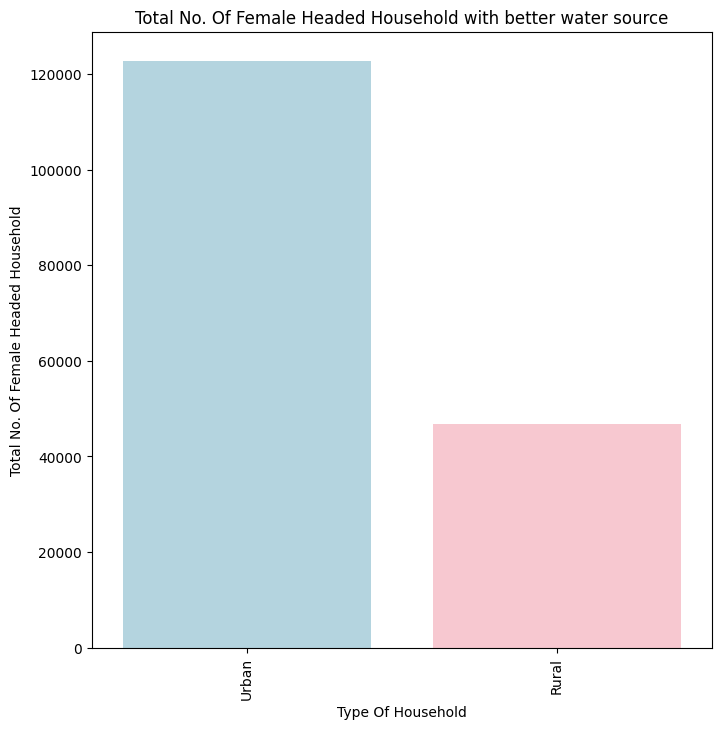

In [ ]:
plt.figure(figsize=(8, 8))
palette_colors = ['lightblue', 'pink']  # Custom colors for the bars
sns.barplot(x='Total/Rural/Urban', y='Total No. Of Female Headed Household', data=rural_urban1, ci=None, palette=palette_colors)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('Total No. Of Female Headed Household with better water source')
plt.xlabel('Type Of Household')
plt.ylabel('Total No. Of Female Headed Household')
plt.show()

In [ ]:
rural_urban2= rural_urban[rural_urban["Source Rank"]==6] #Lowest Rank
rural_urban2=rural_urban2[(rural_urban2["Availability Of Drinking water"]=="Away")].sort_values(by="Total No. Of Female Headed Household",ascending=False)
rural_urban2.head()

,Total/Rural/Urban,Area Name,Source Rank,Availability Of Drinking water,Total No. Of Female Headed Household
48,Rural,ANDHRA PRADESH,6,Away,92806.0
440,Rural,KARNATAKA,6,Away,81803.0
860,Rural,TAMIL NADU,6,Away,31340.0
552,Rural,MAHARASHTRA,6,Away,24000.0
972,Rural,WEST BENGAL,6,Away,19630.0


# PLOT 7

<ipython-input-37-e41e5905b1ae>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




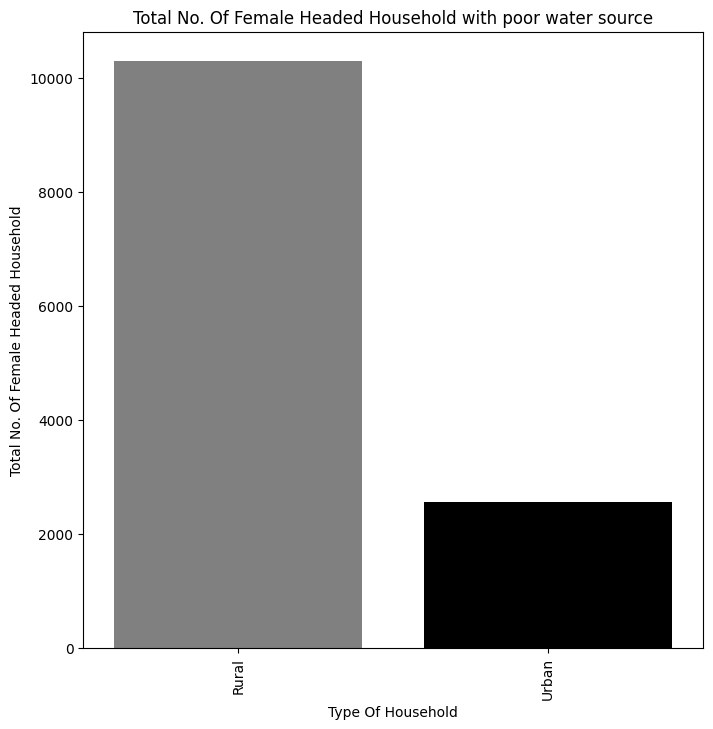

In [ ]:
plt.figure(figsize=(8, 8))
palette_colors = ['gray', 'black']  # Custom colors for the bars
sns.barplot(x='Total/Rural/Urban', y='Total No. Of Female Headed Household', data=rural_urban2, ci=None, palette=palette_colors)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('Total No. Of Female Headed Household with poor water source')
plt.xlabel('Type Of Household')
plt.ylabel('Total No. Of Female Headed Household')
plt.show()

# PLOT 8

In [ ]:
color_map = {'Rural': 'blue', 'Urban': 'pink'}
fig = px.bar(rural_urban1, x='Area Name', y='Total No. Of Female Headed Household', color='Total/Rural/Urban', barmode='group',color_discrete_map=color_map,
             title='Female Headed Households with the better water facilities in Rural and Urban Areas across Places in India')
fig.show()

# PLOT 9

In [ ]:
color_map = {'Rural': 'crimson', 'Urban': 'lightpink'}
fig = px.bar(rural_urban2, x='Area Name', y='Total No. Of Female Headed Household', color='Total/Rural/Urban',color_discrete_map=color_map,barmode='group',
             title='Female Headed Households in Rural and Urban Areas across States in India with poor water facilities')
fig.update_layout(width=1800, height=1000)
fig.show()